**PART-2**

### Tourism Recommendation System Project

**Introduction**

This project aims to develop a recommendation system for tourist spots in Indonesia using user rating data and place information. By analyzing user demographics, tourism categories, and visitor ratings, we seek to understand tourist preferences and build a model that suggests personalized travel destinations.

The system leverages collaborative filtering techniques to recommend places similar to those a tourist already likes, enhancing their travel experience through tailored suggestions.

**Objectives**

- Explore and analyze tourism datasets, including user profiles, place details, and ratings.

- Identify key user demographics and popular tourist categories.

- Understand city-wise distribution of tourist spots and visitor preferences.

- Build and evaluate a collaborative filtering recommendation model to suggest tourist places based on user behavior.

 **Step-1. Import all the datasets and perform preliminary inspections, such as:**
 
         I. Check for missing values and duplicates
         II. Remove any anomalies found in the data

In [1]:
import pandas as pd
import numpy as np

user_df = pd.read_csv("Downloads/Datasets (1)/Capstone 2/Part 2/user.csv")
tourism_rating_df = pd.read_csv("Downloads/Datasets (1)/Capstone 2/Part 2/tourism_rating.csv")
tourism_with_id_df = pd.read_excel("Downloads/Datasets (1)/Capstone 2/Part 2/tourism_with_id.xlsx")

In [2]:
user_df.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [5]:
tourism_rating_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [7]:
tourism_with_id_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [9]:
#Checking missing values for all three files
user_df.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [11]:
tourism_rating_df.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [13]:
tourism_with_id_df.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

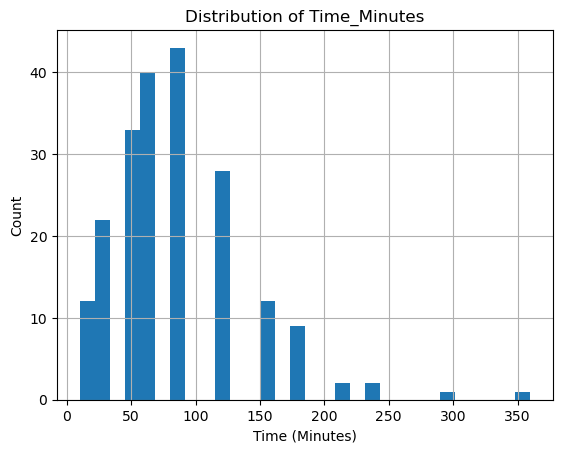

In [15]:
import matplotlib.pyplot as plt
tourism_with_id_df['Time_Minutes'].hist(bins=30)
plt.title('Distribution of Time_Minutes')
plt.xlabel('Time (Minutes)')
plt.ylabel('Count')
plt.show()

In [17]:
median_time = tourism_with_id_df['Time_Minutes'].median()
tourism_with_id_df['Time_Minutes'] = tourism_with_id_df['Time_Minutes'].fillna(median_time)

In [19]:
tourism_with_id_df.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes      0
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

### Handling Missing Values in `Time_Minutes`

The `Time_Minutes` column contains approximately 53% missing values, which is a significant portion of the data. To decide how to handle these missing values, we first analyzed the distribution of the existing `Time_Minutes` data.

The histogram above shows a right-skewed distribution (long tail), where most tourist spots have shorter visit durations, but some have much longer times. Because of this skewness, the median is a more robust measure of central tendency than the mean, as the mean would be influenced by the few very large values.

Therefore, we chose to fill the missing `Time_Minutes` values with the median duration to preserve data while minimizing the impact of outliers.

This approach maintains the integrity of the dataset and ensures that our analysis and modeling are based on as complete a dataset as possible.



In [22]:
tourism_with_id_df.drop(columns=['Unnamed: 11'], inplace=True)

### Handling the `Unnamed: 11` Column with Missing Values

The `Unnamed: 11` column contains 437 missing (empty) values out of the total rows. This column appears to be an extra or unused column imported from the Excel file, likely containing no meaningful information for our analysis.

Because it has no useful data and the majority of its values are missing, we have decided to **drop this column** entirely to clean the dataset and avoid confusion or errors in further analysis.


In [25]:
tourism_with_id_df.isna().sum()

Place_Id        0
Place_Name      0
Description     0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
Coordinate      0
Lat             0
Long            0
Unnamed: 12     0
dtype: int64

Users Age stats:
count    300.000000
mean      28.700000
std        6.393716
min       18.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       40.000000
Name: Age, dtype: float64


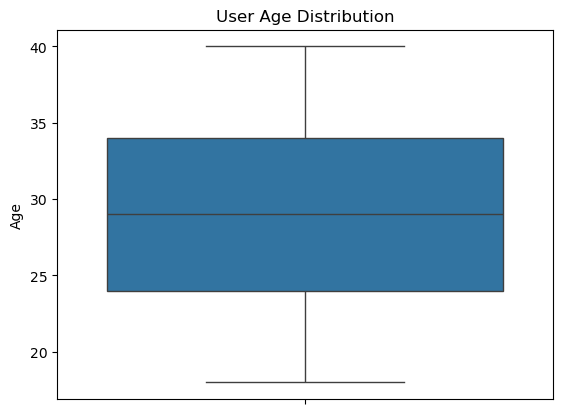

Anomalous ages:
Empty DataFrame
Columns: [User_Id, Location, Age]
Index: []
Users dataset shape after removing anomalies: (300, 3)


In [27]:
#User Dataset: Check and clean anomalies
# Summary statistics for Age
print("Users Age stats:")
print(user_df['Age'].describe())

# Visualize Age distribution with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(user_df['Age'])
plt.title('User Age Distribution')
plt.show()

# Find unrealistic ages (e.g., <10 or >100)
anomalous_ages = user_df[(user_df['Age'] < 10) | (user_df['Age'] > 100)]
print("Anomalous ages:")
print(anomalous_ages)

# Remove unrealistic ages
user_df = user_df[(user_df['Age'] >= 10) & (user_df['Age'] <= 100)]

print("Users dataset shape after removing anomalies:", user_df.shape)

Ratings Place_Ratings stats:
count    10000.000000
mean         3.066500
std          1.379952
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Place_Ratings, dtype: float64


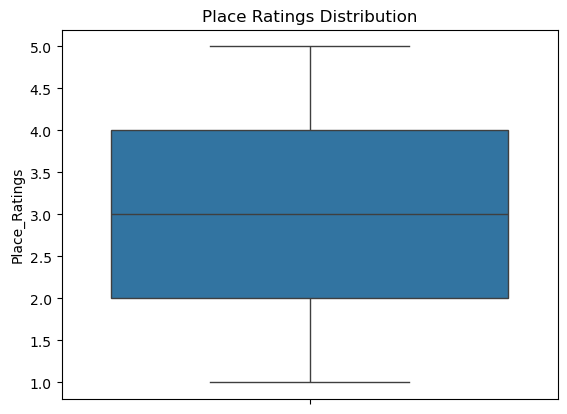

Invalid Place_Ratings:
Empty DataFrame
Columns: [User_Id, Place_Id, Place_Ratings]
Index: []
Ratings dataset shape after removing anomalies: (10000, 3)


In [37]:
#Tourism_ratings Dataset: Check and clean anomalies
# Summary stats for Place_Ratings
print("Ratings Place_Ratings stats:")
print(tourism_rating_df['Place_Ratings'].describe())

# Boxplot for Place_Ratings
sns.boxplot(tourism_rating_df['Place_Ratings'])
plt.title('Place Ratings Distribution')
plt.show()

# Find ratings outside valid range (assuming 1 to 5)
invalid_ratings = tourism_rating_df[(tourism_rating_df['Place_Ratings'] < 1) | (tourism_rating_df['Place_Ratings'] > 5)]
print("Invalid Place_Ratings:")
print(invalid_ratings)

# Remove invalid ratings
ratings_df = tourism_rating_df[(tourism_rating_df['Place_Ratings'] >= 1) & (tourism_rating_df['Place_Ratings'] <= 5)]

print("Ratings dataset shape after removing anomalies:", ratings_df.shape)

Places Price stats:
count       437.000000
mean      24652.173913
std       66446.374709
min           0.000000
25%           0.000000
50%        5000.000000
75%       20000.000000
max      900000.000000
Name: Price, dtype: float64

Places Time_Minutes stats:
count    437.000000
mean      70.606407
std       37.889092
min       10.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      360.000000
Name: Time_Minutes, dtype: float64

Places Rating stats:
count    437.000000
mean       4.442792
std        0.208587
min        3.400000
25%        4.300000
50%        4.500000
75%        4.600000
max        5.000000
Name: Rating, dtype: float64


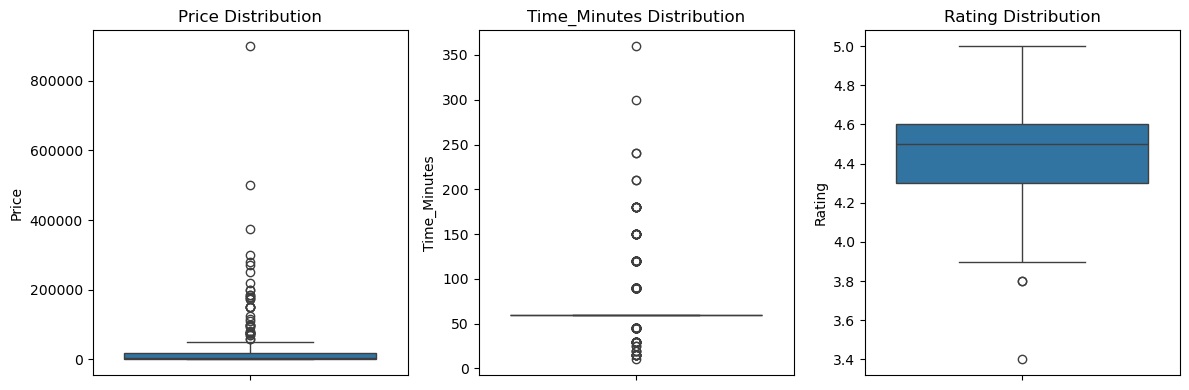

Negative Prices:
Empty DataFrame
Columns: [Place_Id, Place_Name, Description, Category, City, Price, Rating, Time_Minutes, Coordinate, Lat, Long, Unnamed: 12]
Index: []
Invalid Time_Minutes (<=0):
Empty DataFrame
Columns: [Place_Id, Place_Name, Description, Category, City, Price, Rating, Time_Minutes, Coordinate, Lat, Long, Unnamed: 12]
Index: []
Invalid Ratings:
Empty DataFrame
Columns: [Place_Id, Place_Name, Description, Category, City, Price, Rating, Time_Minutes, Coordinate, Lat, Long, Unnamed: 12]
Index: []
Places dataset shape after removing anomalies: (437, 12)


In [39]:
#Tourism_with_id Dataset: Check and clean anomalies
# Summary stats for Price, Time_Minutes, Rating
print("Places Price stats:")
print(tourism_with_id_df['Price'].describe())

print("\nPlaces Time_Minutes stats:")
print(tourism_with_id_df['Time_Minutes'].describe())

print("\nPlaces Rating stats:")
print(tourism_with_id_df['Rating'].describe())

# Boxplots to visualize outliers
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(tourism_with_id_df['Price'])
plt.title('Price Distribution')

plt.subplot(1,3,2)
sns.boxplot(tourism_with_id_df['Time_Minutes'])
plt.title('Time_Minutes Distribution')

plt.subplot(1,3,3)
sns.boxplot(tourism_with_id_df['Rating'])
plt.title('Rating Distribution')

plt.tight_layout()
plt.show()

# Check for negative or zero prices and times
invalid_prices = tourism_with_id_df[tourism_with_id_df['Price'] < 0]
print("Negative Prices:")
print(invalid_prices)

invalid_times = tourism_with_id_df[(tourism_with_id_df['Time_Minutes'] <= 0) & (~tourism_with_id_df['Time_Minutes'].isnull())]
print("Invalid Time_Minutes (<=0):")
print(invalid_times)

# Check for ratings outside 1-5 range
invalid_ratings = tourism_with_id_df[(tourism_with_id_df['Rating'] < 1) | (tourism_with_id_df['Rating'] > 5)]
print("Invalid Ratings:")
print(invalid_ratings)

# Remove invalid rows
tourism_with_id_df = tourism_with_id_df[(tourism_with_id_df['Price'] >= 0)]
tourism_with_id_df = tourism_with_id_df[(tourism_with_id_df['Time_Minutes'] > 0) | (tourism_with_id_df['Time_Minutes'].isnull())]  # keep NaNs for now
tourism_with_id_df = tourism_with_id_df[(tourism_with_id_df['Rating'] >= 1) & (tourism_with_id_df['Rating'] <= 5)]

print("Places dataset shape after removing anomalies:", tourism_with_id_df.shape)

*Checked all datasets for anomalies (age, ratings, prices, times); found none needing removal, so data is clean for analysis.*


**Step-2. To understand the tourism highlights better, you must explore the data in depth.**
  
    Explore the user group that provides the tourism ratings by:
    • Analyzing the age distribution of users visiting the places and rating them 
    • Identifying the places where most of these users (tourists) are coming from

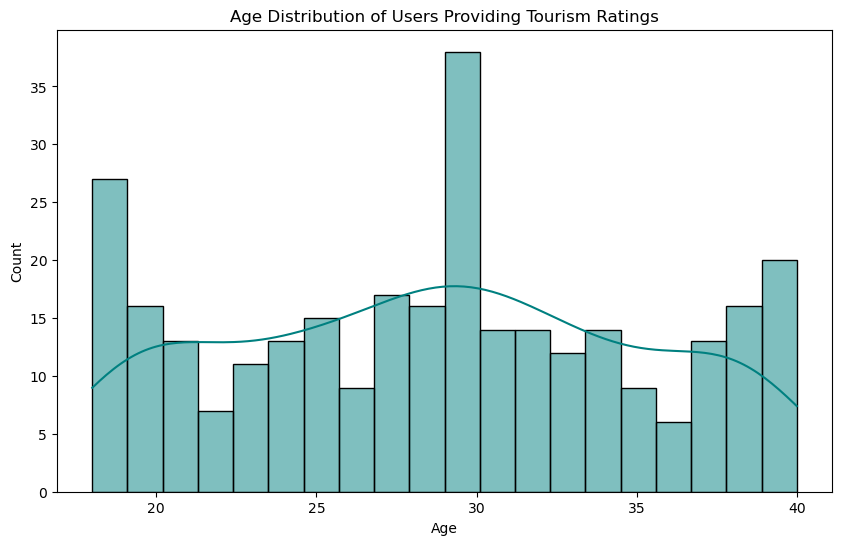

count    300.000000
mean      28.700000
std        6.393716
min       18.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       40.000000
Name: Age, dtype: float64


In [41]:
#Age Distribution of Users Providing Ratings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get unique users who gave ratings
tourism_with_id = user_df[user_df['User_Id'].isin(tourism_rating_df['User_Id'].unique())]

# Plot age distribution
plt.figure(figsize=(10,6))
sns.histplot(tourism_with_id['Age'], bins=20, kde=True, color='teal')
plt.title('Age Distribution of Users Providing Tourism Ratings')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Summary statistics
print(tourism_with_id['Age'].describe())

The users who provided tourism ratings (N=300) have an average age of approximately 29 years, with most aged between 24 and 34, ranging from 18 to 40 years old.

C:\Users\97152\AppData\Local\Temp\ipykernel_15608\303382790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


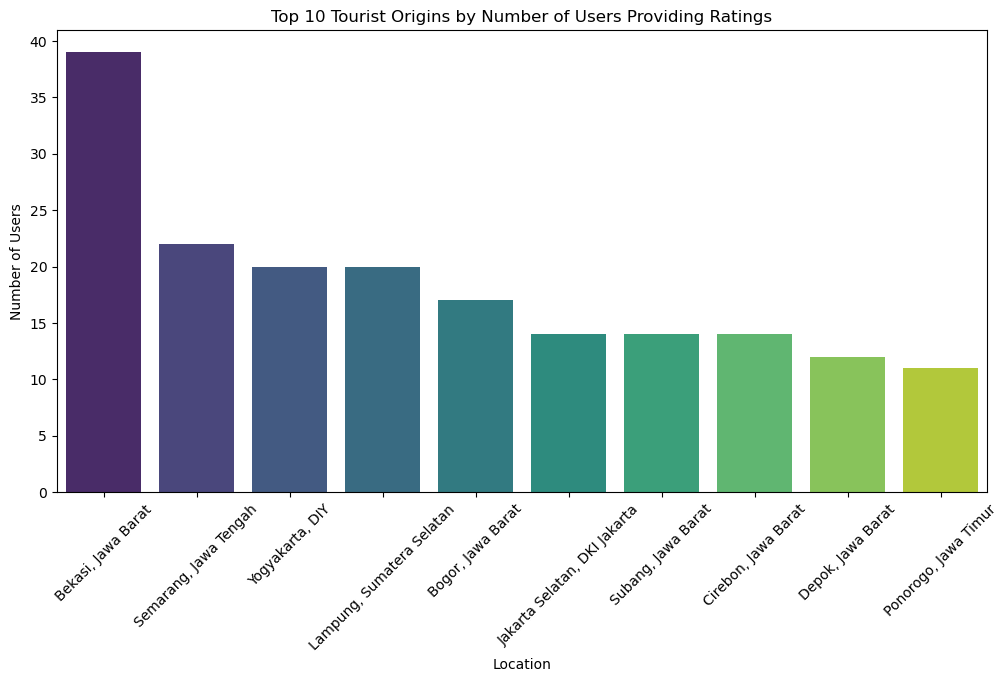

In [43]:
#Top Tourist Origins (User Locations) Providing Ratings
# Count of users by Location (only those who gave ratings)
location_counts = tourism_with_id['Location'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Tourist Origins by Number of Users Providing Ratings')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

**Insights:**

The tourism rating users are predominantly young adults, mostly between 24 and 34 years old, with an average age of 29. Geographically, the largest group of users comes from Bekasi, Jawa Barat, followed by other significant cities such as Semarang, Yogyakarta, and Lampung. This suggests that the platform primarily engages younger tourists from these urban and regional centers, which could inform targeted marketing and personalized recommendation strategies.

 **Step-3. Next, let's explore the locations and categories of tourist spots.**
 
 I. What are the different categories of tourist spots?
 
 II. What kind of tourism each location is most famous or suitable for?
 
 III. Which city would be the best for a nature enthusiast to visit?

Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64


C:\Users\97152\AppData\Local\Temp\ipykernel_15608\3260244071.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')


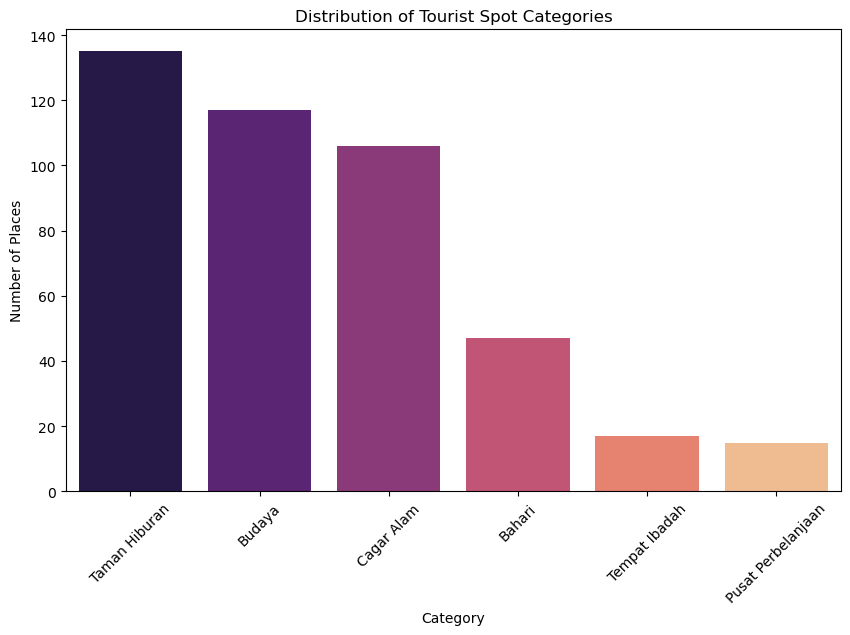

In [45]:
#I. Identify Different Categories of Tourist Spots
# Count how many tourist spots belong to each category
category_counts = tourism_with_id_df['Category'].value_counts()

print(category_counts)

category_counts = tourism_with_id_df['Category'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')
plt.title('Distribution of Tourist Spot Categories')
plt.xlabel('Category')
plt.ylabel('Number of Places')
plt.xticks(rotation=45)
plt.show()

Tourist Spot Categories
The dataset contains 6 distinct categories of tourist spots:

1. Taman Hiburan (Amusement Parks / Entertainment)

2. Budaya (Cultural Sites)

3. Cagar Alam (Nature Reserves)

4. Bahari (Marine Attractions)

5. Tempat Ibadah (Places of Worship)

6. Pusat Perbelanjaan (Shopping Centers)

These categories reflect a diverse range of tourism experiences, from entertainment and culture to nature and shopping, allowing for varied recommendations tailored to different tourist preferences.

*The original dataset contained category names in Indonesian. We used translation tools and examined place descriptions to interpret these categories into English for clarity and analysis.*

In [47]:
#II. Find Most Popular Tourism Type per City
# Group by City and Category, then count spots in each group
city_category_counts = tourism_with_id_df.groupby(['City', 'Category']).size().reset_index(name='Count')

print(city_category_counts.head(30))

          City            Category  Count
0      Bandung              Budaya     22
1      Bandung          Cagar Alam     54
2      Bandung  Pusat Perbelanjaan      1
3      Bandung       Taman Hiburan     39
4      Bandung       Tempat Ibadah      8
5      Jakarta              Bahari      8
6      Jakarta              Budaya     32
7      Jakarta          Cagar Alam      4
8      Jakarta  Pusat Perbelanjaan     10
9      Jakarta       Taman Hiburan     27
10     Jakarta       Tempat Ibadah      3
11    Semarang              Bahari      4
12    Semarang              Budaya     15
13    Semarang          Cagar Alam     20
14    Semarang       Taman Hiburan     15
15    Semarang       Tempat Ibadah      3
16    Surabaya              Bahari      1
17    Surabaya              Budaya     18
18    Surabaya          Cagar Alam      5
19    Surabaya  Pusat Perbelanjaan      1
20    Surabaya       Taman Hiburan     18
21    Surabaya       Tempat Ibadah      3
22  Yogyakarta              Bahari

In [49]:
#Get the Top Category for Each City
# For each city, find the category with the highest count of spots
top_category_per_city = city_category_counts.loc[city_category_counts.groupby('City')['Count'].idxmax()]

print("Top Tourism Category by City:")
print(top_category_per_city)

Top Tourism Category by City:
          City       Category  Count
1      Bandung     Cagar Alam     54
6      Jakarta         Budaya     32
13    Semarang     Cagar Alam     20
17    Surabaya         Budaya     18
26  Yogyakarta  Taman Hiburan     36


Top Tourism Category by City
The analysis reveals that each city tends to specialize in different types of tourist attractions:

1. Bandung is primarily known for its nature reserves (Cagar Alam), with 54 spots.

2. Jakarta is famous for cultural sites (Budaya), having 32 key locations.

3. Yogyakarta stands out for its amusement parks (Taman Hiburan), with 36 popular spots.

4. Other cities like Semarang and Surabaya also highlight nature and cultural tourism respectively.

Understanding these local specializations allows for more tailored and relevant tourism recommendations depending on visitor preferences.

In [51]:
#III. Find Best City for Nature Enthusiasts
# Define categories related to nature tourism
nature_categories = ['Nature', 'Parks', 'Natural Attractions', 'Taman Hiburan']

# Filter spots belonging to these nature-related categories
nature_places = tourism_with_id_df[tourism_with_id_df['Category'].isin(nature_categories)]

# Count how many nature spots are in each city
nature_counts_by_city = nature_places['City'].value_counts()

print(nature_counts_by_city)

City
Bandung       39
Yogyakarta    36
Jakarta       27
Surabaya      18
Semarang      15
Name: count, dtype: int64


Nature-Related Tourist Spots by City
The data indicates the number of nature-related tourist spots available in each city:

1. Bandung leads with 39 nature-focused attractions, making it a prime destination for nature enthusiasts.

2. Yogyakarta follows closely with 36 such places.

3. Other cities like Jakarta (27), Surabaya (18), and Semarang (15) also offer a good variety of nature tourism options.

This distribution highlights Bandung and Yogyakarta as top cities for visitors seeking natural experiences.

**Step-4 To better understand tourism, you need to create a combined data with places and their user 
ratings.**

    I. Use this data to figure out the spots that are most loved by the tourists. Also, which city 
    has the most loved tourist spots?

    II. Indonesia provides a wide range of tourist spots ranging from historical and cultural 
    beauties to advanced amusement parks. Among these, which category of places are users 
    liking the most?

In [53]:
#Merge Places and Ratings Data
# Merge on Place_Id to get place info along with ratings
combined_df = pd.merge(tourism_rating_df, tourism_with_id_df, on='Place_Id', how='left')

# Quick look
print(combined_df.head())

   User_Id  Place_Id  Place_Ratings                     Place_Name  \
0        1       179              3                Candi Ratu Boko   
1        1       344              2                  Pantai Marina   
2        1         5              5       Atlantis Water Adventure   
3        1       373              3         Museum Kereta Ambarawa   
4        1       101              4  Kampung Wisata Sosro Menduran   

                                         Description       Category  \
0  Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...         Budaya   
1  Pantai Marina (bahasa Jawa: Í¶•Í¶±Í¶∂Í¶±Í¶∂Í¶Ç...         Bahari   
2  Atlantis Water Adventure atau dikenal dengan A...  Taman Hiburan   
3  Museum Kereta Api Ambarawa (bahasa Inggris: In...         Budaya   
4  Kampung wisata Sosromenduran merupakan kampung...         Budaya   

         City  Price  Rating  Time_Minutes  \
0  Yogyakarta  75000     4.6          90.0   
1    Semarang   3000     4.1          60.0   
2     Jakarta 

In [55]:
#Find Most Loved Tourist Spots (Highest Average Ratings)
# Calculate average rating for each place
place_avg_ratings = combined_df.groupby(['Place_Id', 'Place_Name', 'City', 'Category'])['Place_Ratings'].mean().reset_index()

# Sort by highest average rating descending
top_places = place_avg_ratings.sort_values(by='Place_Ratings', ascending=False).head(10)

print("Top 10 Most Loved Tourist Spots:")
print(top_places[['Place_Name', 'City', 'Category', 'Place_Ratings']])

Top 10 Most Loved Tourist Spots:
                                Place_Name        City       Category  \
415                       Keraton Surabaya    Surabaya         Budaya   
138  Puncak Gunung Api Purba - Nglanggeran  Yogyakarta     Cagar Alam   
51                            Kampung Cina     Jakarta         Budaya   
253                 Teras Cikapundung BBWS     Bandung  Taman Hiburan   
96                   Monumen Yogya Kembali  Yogyakarta         Budaya   
321                            Bukit Jamur     Bandung     Cagar Alam   
111               Bukit Bintang Yogyakarta  Yogyakarta  Taman Hiburan   
0                         Monumen Nasional     Jakarta         Budaya   
320            Glamping Lakeside Rancabali     Bandung  Taman Hiburan   
156                           Pantai Baron  Yogyakarta         Bahari   

     Place_Ratings  
415       3.967742  
138       3.882353  
51        3.842105  
253       3.789474  
96        3.772727  
321       3.766667  
111       3.7647

In [57]:
#City with the Most Loved Tourist Spots
#Calculate the average rating across all places in each city
city_avg_ratings = place_avg_ratings.groupby('City')['Place_Ratings'].mean().reset_index()

top_cities = city_avg_ratings.sort_values(by='Place_Ratings', ascending=False)

print("Cities with Highest Average Tourist Spot Ratings:")
print(top_cities)

Cities with Highest Average Tourist Spot Ratings:
         City  Place_Ratings
4  Yogyakarta       3.103519
0     Bandung       3.079645
3    Surabaya       3.060591
2    Semarang       3.035216
1     Jakarta       3.019858


C:\Users\97152\AppData\Local\Temp\ipykernel_15608\726457933.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Place_Ratings', palette='coolwarm')


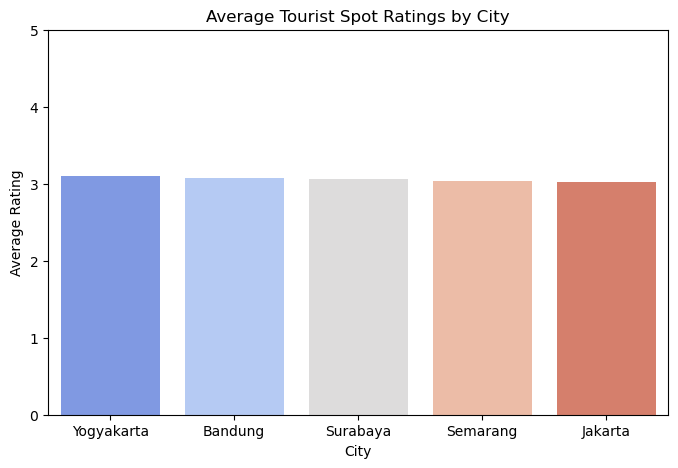

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=top_cities, x='City', y='Place_Ratings', palette='coolwarm')
plt.title('Average Tourist Spot Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # assuming ratings out of 5
plt.show()

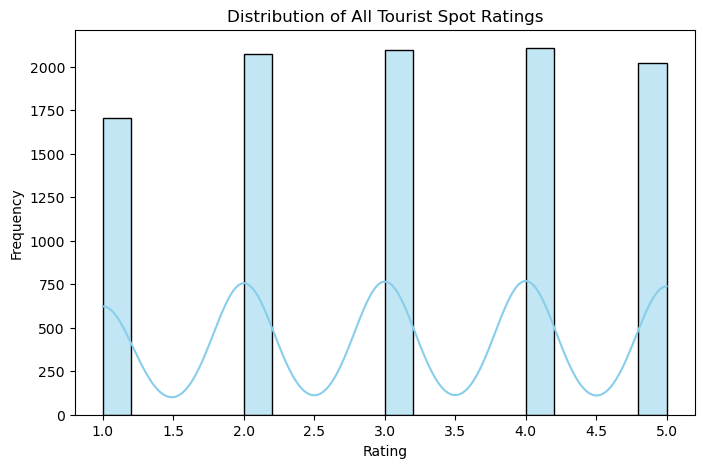

In [80]:
plt.figure(figsize=(8,5))
sns.histplot(combined_df['Place_Ratings'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of All Tourist Spot Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Tourist Ratings Summary
Average ratings across cities are quite similar, indicating consistent tourist satisfaction. The majority of ratings fall in the mid-to-high range, which explains the small differences in averages.

In [61]:
#Which Category of Places Are Users Liking the Most?
# Average rating by category
category_avg_ratings = place_avg_ratings.groupby('Category')['Place_Ratings'].mean().reset_index()

# Sort by highest rating
top_categories = category_avg_ratings.sort_values(by='Place_Ratings', ascending=False)

print("Tourist Categories Liked the Most by Users:")
print(top_categories)


Tourist Categories Liked the Most by Users:
             Category  Place_Ratings
4       Taman Hiburan       3.118530
2          Cagar Alam       3.079169
5       Tempat Ibadah       3.070954
1              Budaya       3.035754
0              Bahari       3.005750
3  Pusat Perbelanjaan       2.955259


C:\Users\97152\AppData\Local\Temp\ipykernel_15608\893040774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='Category', y='Place_Ratings', palette='viridis')


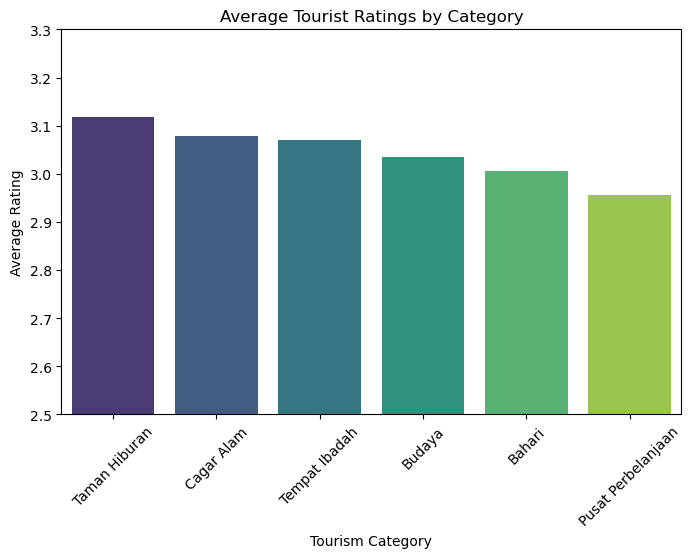

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_categories, x='Category', y='Place_Ratings', palette='viridis')
plt.title('Average Tourist Ratings by Category')
plt.xlabel('Tourism Category')
plt.ylabel('Average Rating')
plt.ylim(2.5, 3.3)
plt.xticks(rotation=45)
plt.show()

**Tourist Categories Liked the Most:**

Amusement parks (Taman Hiburan) and nature reserves (Cagar Alam) are the highest-rated categories by tourists, followed closely by places of worship. Cultural and shopping spots have slightly lower but still positive ratings, highlighting varied tourist preferences.

**Step-5 Build a recommender model for the system:**
     
     I. Use the above data to develop a collaborative filtering model for recommendation and 
     use that to recommend other places to visit using the current tourist location, place, name.

In [65]:
#Step 1: Prepare the Data
#Create a user-item matrix where rows are users, columns are places, and values are ratings.
#Combined_df has User_Id, Place_Name, Place_Ratings
user_item_matrix = combined_df.pivot_table(index='User_Id', columns='Place_Name', values='Place_Ratings')

# Check matrix shape
print(user_item_matrix.shape)

(300, 437)


In [67]:
#Step 2: Fill Missing Values
#Most user-place pairs won’t have ratings, so fill missing values with 0 or use another approach depending on the algorithm.
user_item_matrix_filled = user_item_matrix.fillna(0)
user_item_matrix_filled.head()

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
User_Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#Step 3: Compute Similarities
#We can use cosine similarity between places (item-based CF) or users (user-based CF).
from sklearn.metrics.pairwise import cosine_similarity
# Calculate similarity between places (columns)
## Transpose so places are rows
place_similarity = cosine_similarity(user_item_matrix_filled.T)

# Convert to DataFrame for easier handling, with place names as index and columns
place_similarity_df = pd.DataFrame(place_similarity, 
                                   index=user_item_matrix_filled.columns, 
                                   columns=user_item_matrix_filled.columns)

# Print the similarity matrix shape and top-left corner snippet
print("Similarity matrix shape:", place_similarity_df.shape)
print(place_similarity_df.iloc[:5, :5])  # first 5 rows and columns

Similarity matrix shape: (437, 437)
Place_Name               Air Mancur Menari  Air Terjun Kali Pancur  \
Place_Name                                                           
Air Mancur Menari                 1.000000                0.000000   
Air Terjun Kali Pancur            0.000000                1.000000   
Air Terjun Kedung Pedut           0.096964                0.041091   
Air Terjun Semirang               0.000000                0.031167   
Air Terjun Sri Gethuk             0.019490                0.030910   

Place_Name               Air Terjun Kedung Pedut  Air Terjun Semirang  \
Place_Name                                                              
Air Mancur Menari                       0.096964             0.000000   
Air Terjun Kali Pancur                  0.041091             0.031167   
Air Terjun Kedung Pedut                 1.000000             0.018004   
Air Terjun Semirang                     0.018004             1.000000   
Air Terjun Sri Gethuk              

In [87]:
#Step 4: Recommendation Function
def recommend_places(place_name, similarity_df, n=5):
    if place_name not in similarity_df.columns:
        return f"No data available for {place_name}"
    
    # Get similarity scores for the given place
    sim_scores = similarity_df[place_name]
    
    # Exclude the place itself
    sim_scores = sim_scores.drop(place_name)
    
    # Sort and get top N
    top_recommendations = sim_scores.sort_values(ascending=False).head(n)
    
    return top_recommendations

# Example
recommendations = recommend_places('Monumen Nasional', place_similarity_df, n=5)
print(recommendations)

Place_Name
Wisata Mangrove Tapak       0.268835
Danau Rawa Pening           0.262729
Museum Sonobudoyo Unit I    0.260171
Dunia Fantasi               0.252406
Situ Patenggang             0.241168
Name: Monumen Nasional, dtype: float64


In [89]:
def recommend_places(place_name, similarity_df, n=5):
    """
    Recommend top N similar places to the given place_name using
    an item-based collaborative filtering similarity matrix.
    """
    if place_name not in similarity_df.columns:
        return f"No data available for {place_name}"
    
    # Drop the place itself from similarity list
    sim_scores = similarity_df[place_name].drop(place_name)
    
    # Sort scores and select top N
    top_recommendations = sim_scores.sort_values(ascending=False).head(n)
    
    # Convert to DataFrame for plotting
    recs_df = pd.DataFrame({
        'Recommended Place': top_recommendations.index,
        'Similarity Score': top_recommendations.values
    }).reset_index(drop=True)
    
    return recs_df

Top 5 recommendations for 'Monumen Nasional':

       Recommended Place  Similarity Score
   Wisata Mangrove Tapak          0.268835
       Danau Rawa Pening          0.262729
Museum Sonobudoyo Unit I          0.260171
           Dunia Fantasi          0.252406
         Situ Patenggang          0.241168


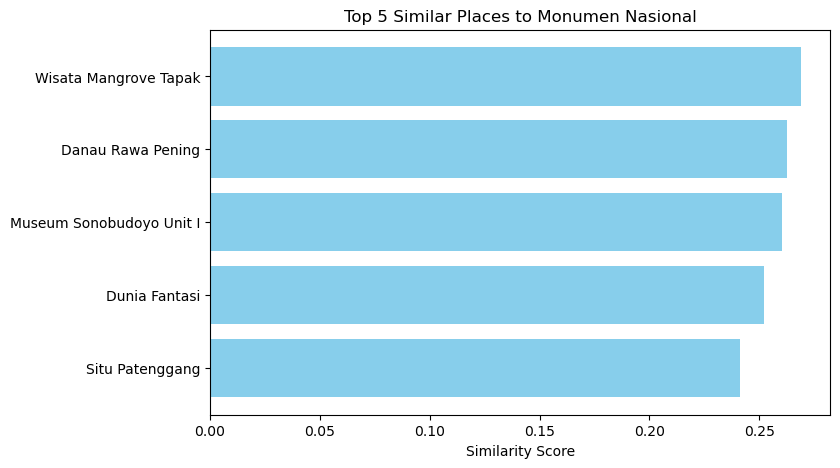

In [91]:
def plot_recommendations(place_name, similarity_df, n=5):
    recs = recommend_places(place_name, similarity_df, n)
    
    # Print recommendations with similarity scores
    print(f"Top {n} recommendations for '{place_name}':\n")
    print(recs.to_string(index=False))
    
    # Plotting
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,5))
    plt.barh(recs['Recommended Place'], recs['Similarity Score'], color='skyblue')
    plt.xlabel("Similarity Score")
    plt.title(f"Top {n} Similar Places to {place_name}")
    plt.gca().invert_yaxis()  # Highest score on top
    plt.show()

# Example usage
plot_recommendations("Monumen Nasional", place_similarity_df, n=5)

**Collaborative Filtering Recommendation Model**

1. Created a user-item matrix from the combined dataset with 300 users and 437 tourist places, filling missing ratings with zeros.

2. Calculated item-based cosine similarity to measure how similar tourist spots are based on user rating patterns.

3. Developed a recommendation function that, given a tourist spot (e.g., Monumen Nasional), returns the top similar places tourists might like.

4. The example recommendations illustrate the model’s ability to suggest relevant spots, helping personalize tourist experiences.

5. Monumen Nasional was chosen due to its prominence and sufficient rating data, and because Taman Hiburan (Amusement Parks) was identified as the   highest-rated category, showcasing the system’s practical application.

**Final Remarks**
In this project, we explored tourism data from multiple perspectives — user demographics, tourist spot categories, and user ratings — to understand visitor preferences better. Using collaborative filtering, we built a recommendation system that suggests tourist spots similar to a given location based on user rating patterns.

Our findings show consistent tourist preferences across cities, with amusement parks and nature reserves ranking highest in user ratings. The recommendation model demonstrated its potential to personalize travel suggestions effectively, enhancing tourist experience and engagement.

Future work could include incorporating more user context, combining collaborative filtering with content-based methods, and expanding datasets to improve recommendation accuracy.

This project provides a solid foundation for developing intelligent tourism recommendation systems that cater to diverse user interests.

-------------------------------------------------------------**End of Project**---------------------------------------------------------------------------